## Image read from ../data/EngageNY/g07-task-01.png:

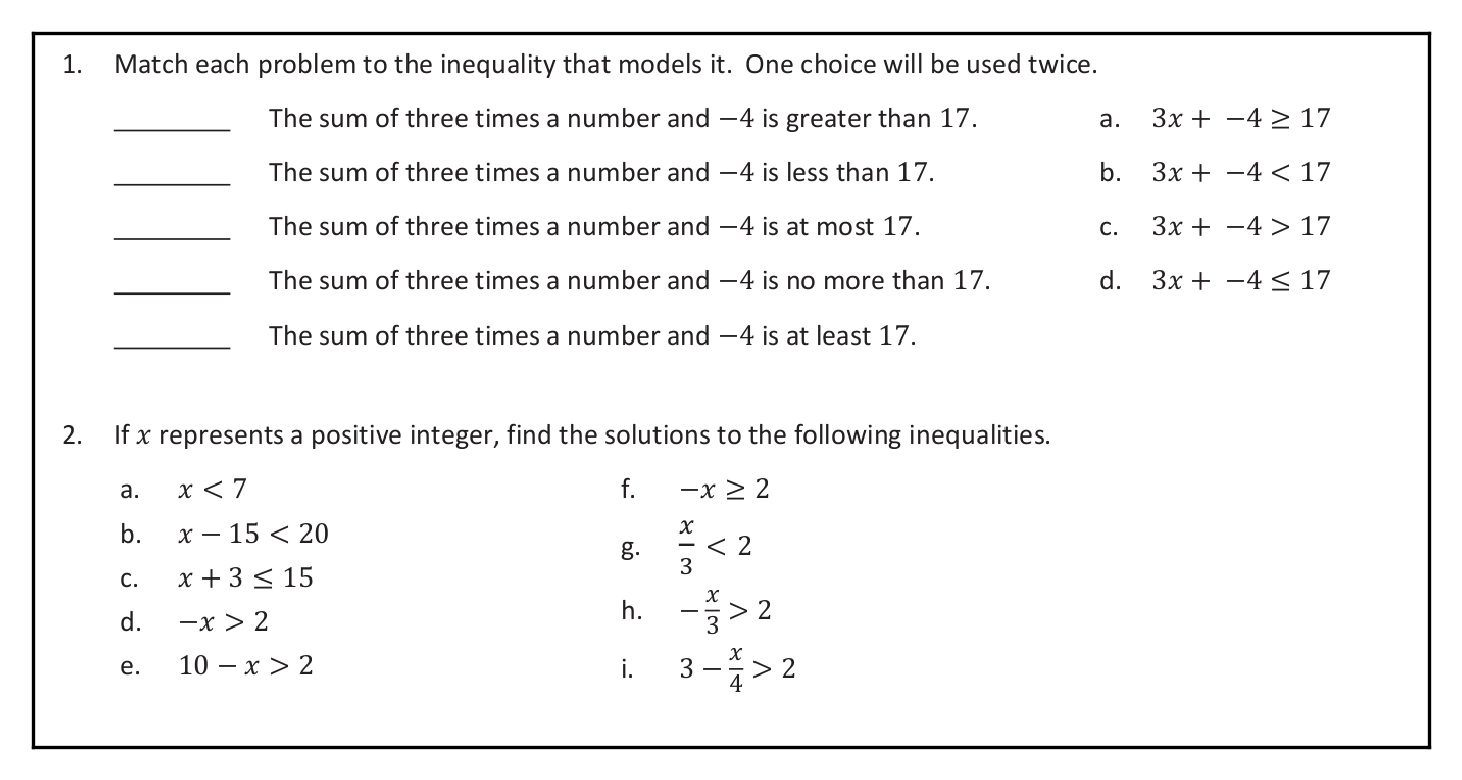

In [1]:
from IPython.utils import io as jio
import matplotlib as mpl
from IPython.display import display,Markdown 


mpl.rcParams['figure.dpi']= 300

task = 'g07-task-01'
file = '../data/EngageNY/%s.png' % task
timg = cv2.imread(file);

with jio.capture_output() as captured:
    # just render the top 400 pixel-rows of the image
    plt.imshow(cv2.cvtColor(timg, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
 
display(Markdown('## Image read from %s:' % file))
plt.show()

In [2]:
import pytesseract as tess

txt = tess.image_to_string(timg, lang='eng') ;
lines = txt.split('\n')

display(Markdown( '## Lines of text found by `tesseract -l eng` \n* ' + '\n* '.join(lines)))

## Lines of text found by `tesseract -l eng` 
* 1.
* 
* Match each problem to the inequality that models it. One choice will be used twice.
* The sum of three times a number and —4 is greater than 17.
* The sum of three times a number and —4 is less than 17.
* The sum of three times a number and —4 is at most 17.
* The sum of three times a number and —4 is no more than 17.
* 
* The sum of three times a number and —4 is at least 17.
* 
* If x represents a positive integer, find the solutions to the following inequalities.
* 
* a x<7 f. -x22
* _ x
* 
* b. x-15< 20 g ~<2
* 
* c x+3<15 a
* 
* d. -x>2 h -3>2
* 
* e 10-x>2
* 
* x
* 3-G>2
* 
* 3x+ -4217
* 3x+ -4<17
* 3x+ —4>17
* 3x+ -4<517

# Bounding Boxes and Confidence Scores from Tesseract 3.05+

From the docs: pytesseract.image_to_data()
Returns result containing box boundaries, confidences, and other information. Requires Tesseract 3.05+. 

(Basically it runs the `tesseract ... tsv` command line)
The output is returned as a tab-seperated data table. We bring this into a pandas dataframe via
pandas.read_csv()


In [20]:
import io
import pandas

tess_data_schema = {'block_num': int, 'conf': int, 'height': int, 'left': int,
                    'level': int, 'line_num': int, 'page_num': int, 'par_num': int,
                    'text': str,
                    'top': int, 'width': int, 'word_num': int }

data = tess.image_to_data(timg, lang='eng', config="--psm 11 --oem 1")
tdata = pandas.read_csv(io.StringIO(data), sep="\t", dtype=tess_data_schema) ;

display(Markdown( '## Output of `image_to_data()`\n * --oem 1 : LSTM neural net\n * --psm 11 : Sparse text; find as much text as possible'))
tdata[1:30]


## Output of `image_to_data()`
 * --oem 1 : LSTM neural net
 * --psm 11 : Sparse text; find as much text as possible

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
1,2,1,1,0,0,0,30,22,11,18,-1,NaN
2,3,1,1,1,0,0,30,22,11,18,-1,NaN
3,4,1,1,1,1,0,30,22,11,18,-1,NaN
4,5,1,1,1,1,1,30,22,11,18,94,1
5,2,1,2,0,0,0,81,21,961,24,-1,NaN
6,3,1,2,1,0,0,81,21,961,24,-1,NaN
7,4,1,2,1,1,0,81,21,961,24,-1,NaN
8,5,1,2,1,1,1,81,21,70,19,96,Match
9,5,1,2,1,1,2,160,21,51,19,96,each
10,5,1,2,1,1,3,222,21,94,24,96,problem



## This is a plot of the various levels of bounding box data in the tesseract output.
* Level 5 (green) is word-level segmentaiton.
* Levels 2 through 4 (with the --psm 11 segmentaiton algorithm chosen above) are lines of text
* (Level 1 has the bounding box for the entire image)
* **Note:** some of the bounding boxes (for the math) overlap... later we will merge such boxes


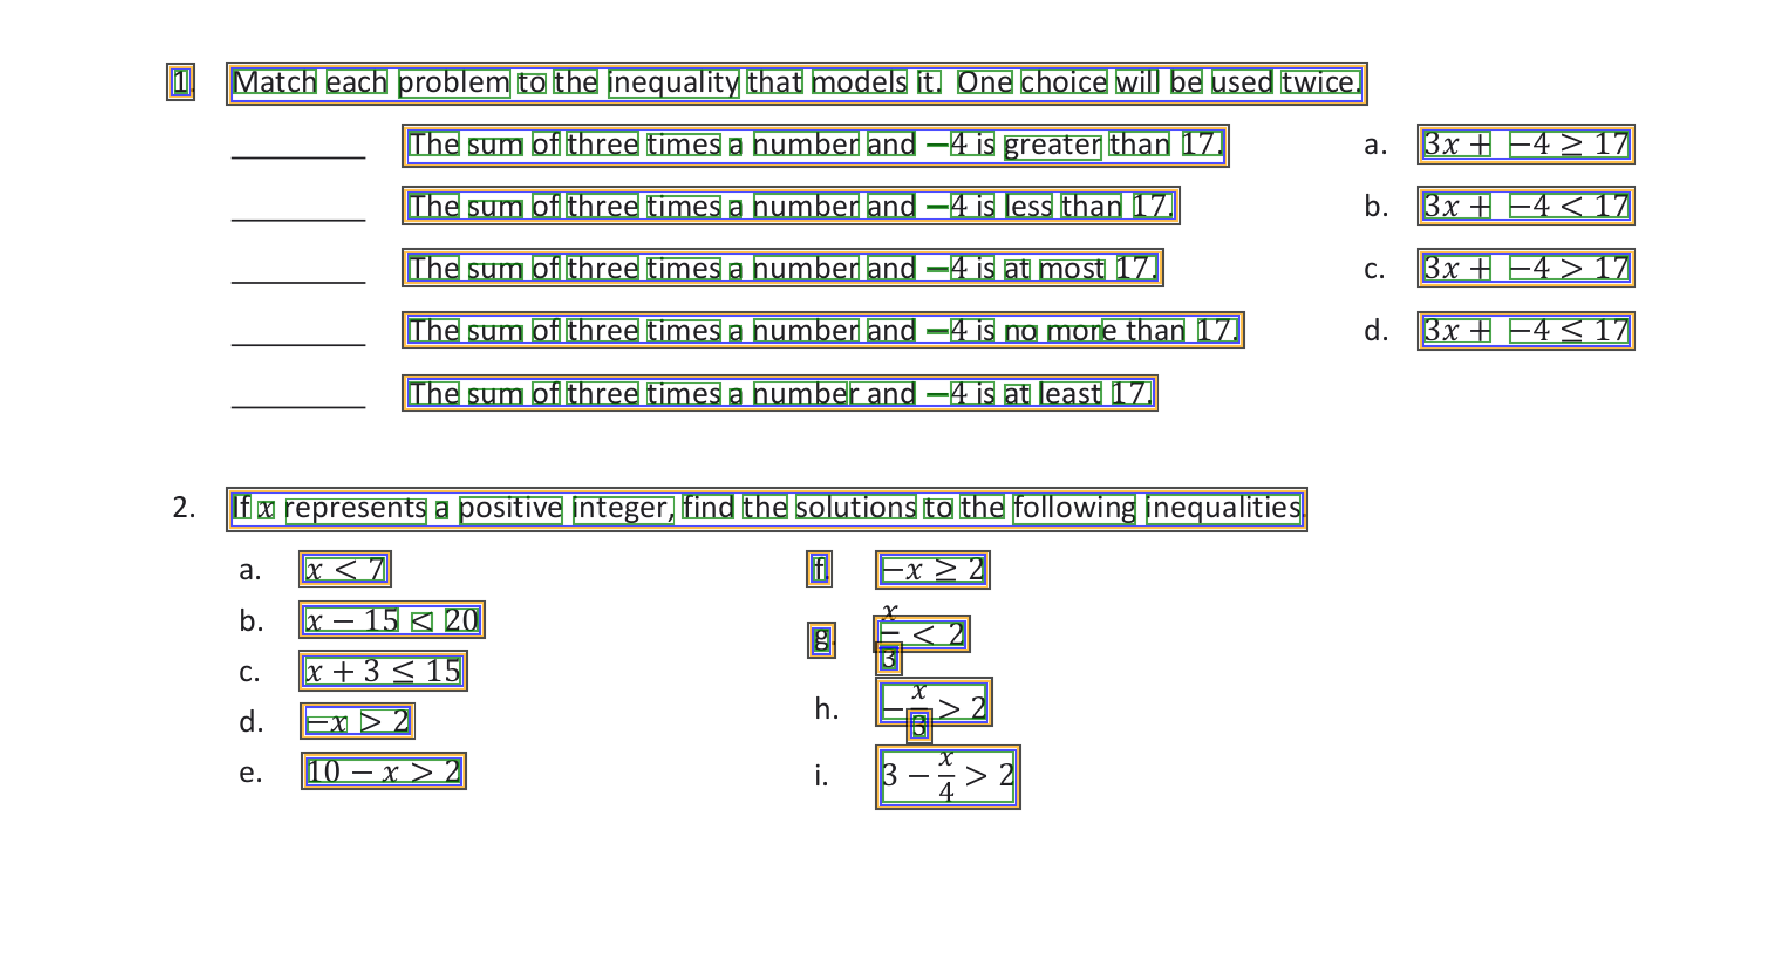

In [4]:
import matplotlib.patches as patches

display(Markdown('''
## This is a plot of the various levels of bounding box data in the tesseract output.
* Level 5 (green) is word-level segmentaiton.
* Levels 2 through 4 (with the --psm 11 segmentaiton algorithm chosen above) are lines of text
* (Level 1 has the bounding box for the entire image)
* **Note:** some of the bounding boxes (for the math) overlap... later we will merge such boxes
'''))


with jio.capture_output() as captured:
    fig, ax = plt.subplots()
    ax.imshow(timg)
    li = 0
    for index, row in tdata.iterrows():
        alpha = 0.7
        color = ['', 'red', 'black', 'orange', 'blue', 'green'][row.level]
        pad = 10-2*row.level
        fill = False
        rect = patches.Rectangle((row.left-pad,row.top-pad), row.width+2*pad, row.height+2*pad,
                                  fill=fill, edgecolor=color, alpha=alpha, linewidth=0.5)
        ax.add_patch(rect)

    ax.set_axis_off()
    plt.tight_layout()
plt.show()

# Below we illustrate word confidence scores in three ranges (high,med,low).

# Bounding boxes for grouped regions / lines are shown in grey.

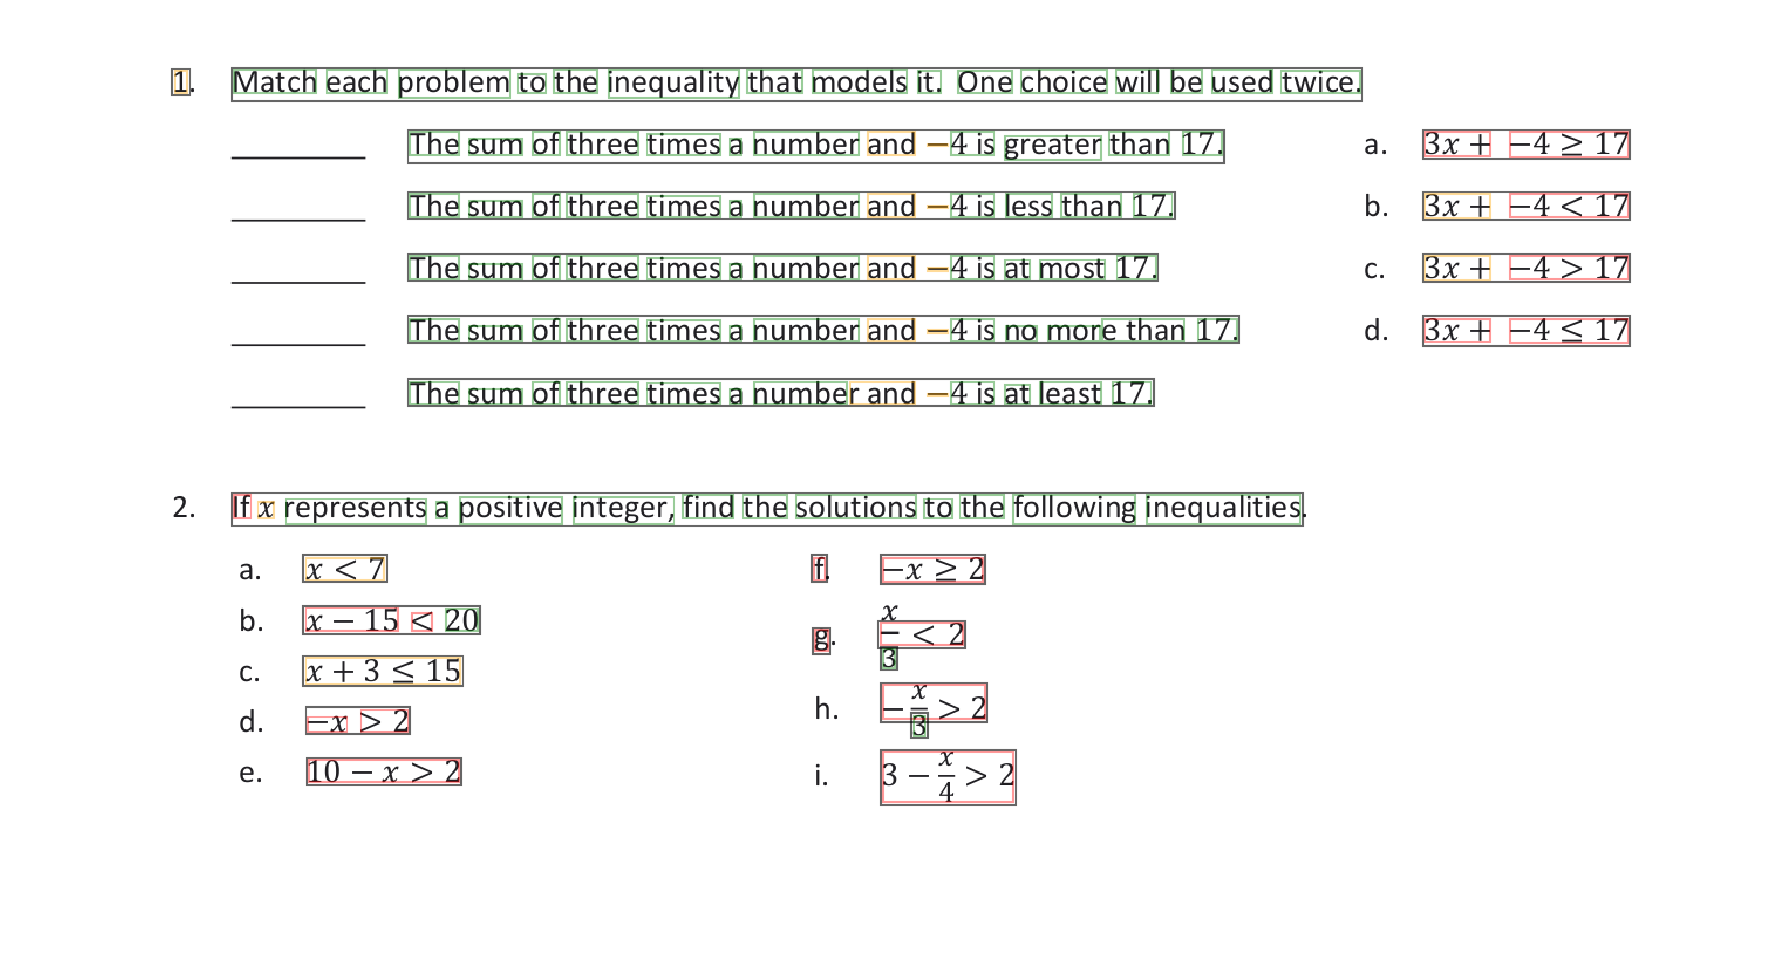

In [5]:

with jio.capture_output() as captured:
    fig, ax = plt.subplots()
    ax.imshow(timg)
    for index, row in tdata.iterrows():
        if row.level!=2 and row.level !=5:
            continue
        pad = 0
        alpha = 0.4
        color = 'green' if row.conf>=95 else ('orange' if row.conf>80 else 'red')
        if row.level<5:
            color = "black"
            pad = 2
            alpha = 0.6
        rect = patches.Rectangle((row.left-pad,row.top-pad), row.width+2*pad, row.height+2*pad,
                                  fill=False, edgecolor=color, alpha=alpha, linewidth=0.5)
        ax.add_patch(rect)

    ax.set_axis_off()
    plt.tight_layout()
    
display(Markdown('# Below we illustrate word confidence scores in three ranges (high,med,low).'))    
display(Markdown('# Bounding boxes for grouped regions / lines are shown in grey.'))    

plt.show()

In [6]:

# Text Bounding Box Class to put a little sanity around the data that comes out of Tesseract
class TBox:
    def __init__(self, x0, y0, width, height):
        self.x0 = x0
        self.y0 = y0
        self.width = width
        self.height = height
        self.txt = []
        self.conf = []
    @property
    def x1(self):
        return self.x0 + self.width
    @property
    def y1(self):
        return self.y0 + self.height
    def pad(self,d):
        self.x0 -= d; self.y0 -= d;
        self.width += 2*d; self.height += 2*d;
    def add_txt(self,txt,conf):
        self.txt.append(txt)
        self.conf.append(conf)
    def intersects(self,other):
        return not (self.x0>other.x1 or self.x1<other.x0 or self.y0>other.y1 or self.y1<other.y0)
    def contains(self,other,buffer=0):
        return (self.x0-buffer<=other.x0 and other.x1<=self.x1+buffer and 
                self.y0-buffer<=other.y0 and other.y1<=self.y1+buffer)
    def merge(self,other):
        x0 = min(self.x0,other.x0)
        y0 = min(self.y0,other.y0)
        x1 = max(self.x1,other.x1)
        y1 = max(self.y1,other.y1)
        m = TBox(x0,y0,x1-x0,y1-y0)
        m.txt = self.txt+other.txt
        m.conf = self.conf+other.conf
    @property
    def text(self):
        return ' '.join(self.txt)
    @property
    def mean_conf(self):
        return np.mean(self.conf)
    @property
    def area(self):
        return self.width * self.height
    
# We collect a list of bounding boxes (TBoxes)  the pandas dataframe that correspond to the level 2 boxes there.
# In each, we collect all of the underlying (level 5) identified text and confidences.

boxes = [] # list of TBoxes
cur = None
for index, row in tdata.iterrows():
    if row.level==2:
        cur = TBox(row.left,row.top, row.width,row.height)
        cur.pad(2)
        boxes.append(cur)
    if row.level==5:
        cur.add_txt(row.text, row.conf)

# We derive a list of TBoxes from boxes [] by finding any bounding boxes that overlap and
# merging them into a superset bounding TBox.
merged = []
for b in boxes:
    found_merge = False;
    for m in merged:
        if b.intersects(m):
            j = b.merge(m)
            found_merge = True;
            break;
    if not found_merge:
        merged.append(b)
                   
display(Markdown('### Merged %d boxes.' % (len(boxes)-len(merged))))


### Merged 2 boxes.


## A very rudimentary classifier.
* Look at the average confidence for the (sub-words) within each region / bounding box.
* If the average confidence is below 90%, classify it as 'likely math', else English text.
* Why average confidence and why 90%? No reason. 
* A better approach would be to use bayesian inference 
* A better approach would also consider recognized charcters like {<, >, =, +, ...} as likely-math


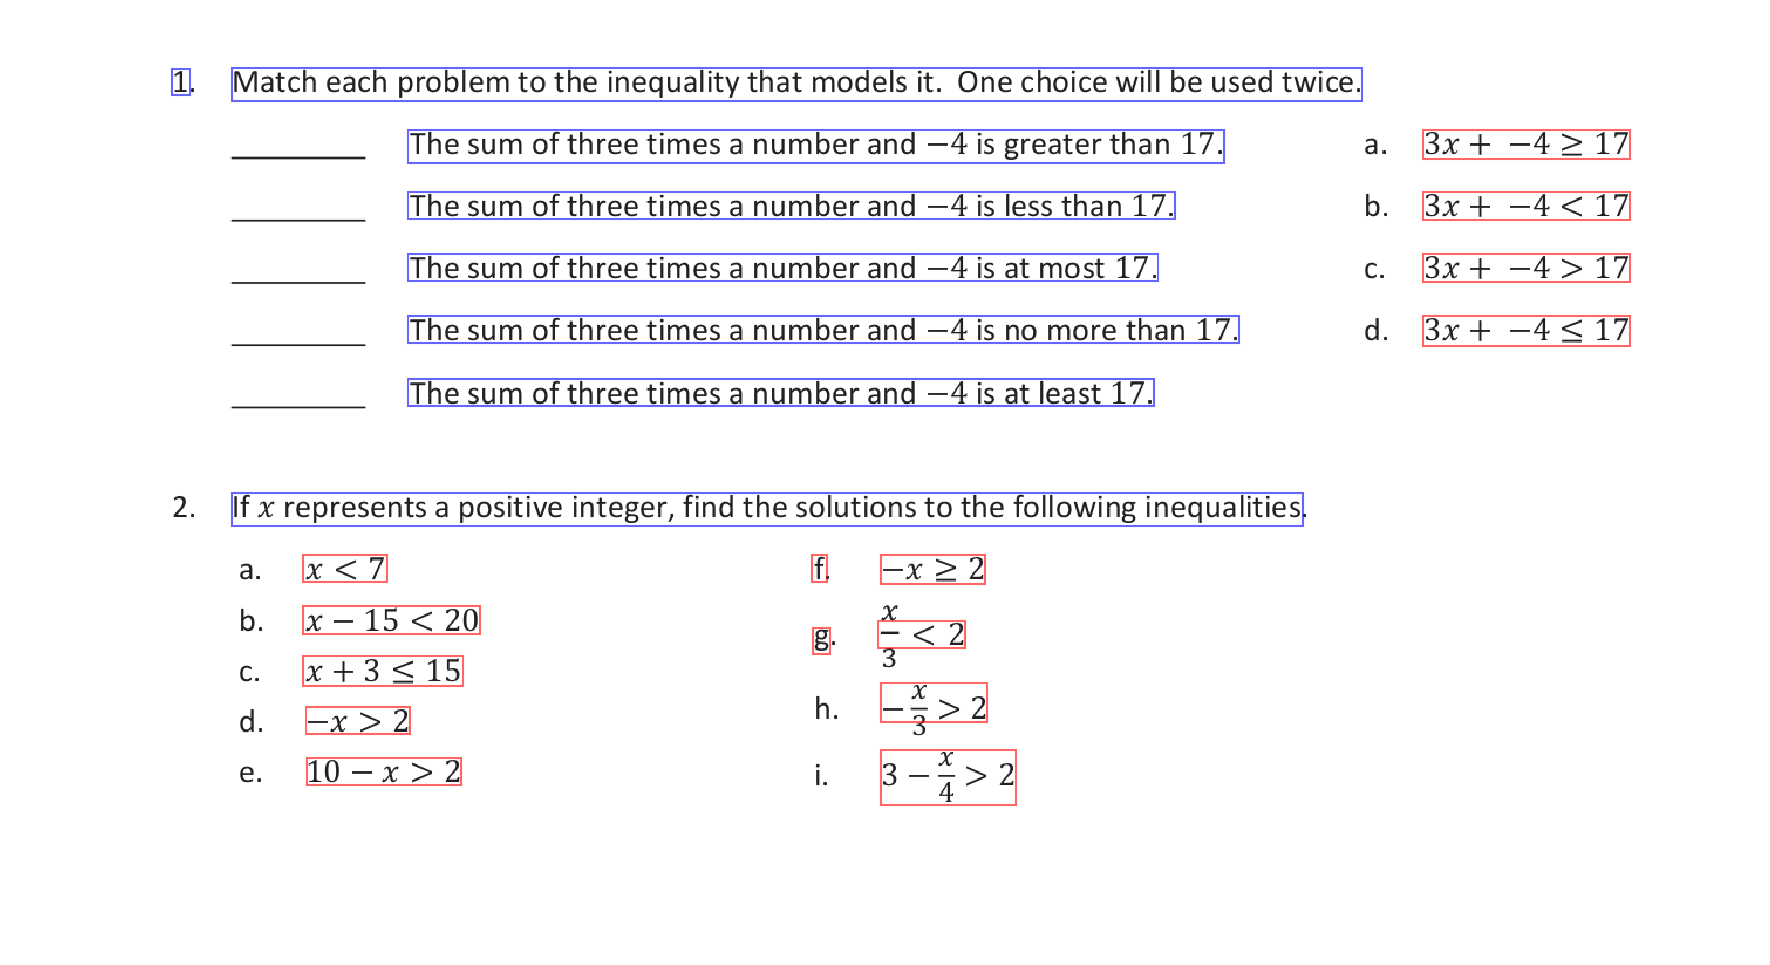

## The text extracted from the regions classified as English (blue boxes) was:
* 1
* Match each problem to the inequality that models it. One choice will be used twice.
* The sum of three times a number and —4 is greater than 17.
* The sum of three times a number and —4 is less than 17.
* The sum of three times a number and —4 is at most 17.
* The sum of three times a number and —4 is no more than 17.
* The sum of three times a number and —4 is at least 17.
* If x represents a positive integer, find the solutions to the following inequalities.


In [7]:
display(Markdown('''
## A very rudimentary classifier.
* Look at the average confidence for the (sub-words) within each region / bounding box.
* If the average confidence is below 90%, classify it as 'likely math', else English text.
* Why average confidence and why 90%? No reason. 
* A better approach would be to use bayesian inference 
* A better approach would also consider recognized charcters like {<, >, =, +, ...} as likely-math
'''))

md = '## The text extracted from the regions classified as English (blue boxes) was:\n'
with jio.capture_output() as captured:
    fig, ax = plt.subplots()
    ax.imshow(timg)
    for b in merged:
        pad = 0
        likely_math = (b.mean_conf<90)
        color = 'red' if likely_math else 'blue'
        rect = patches.Rectangle((b.x0,b.y0), b.width, b.height,
                                  fill=False, edgecolor=color, alpha=0.6, linewidth=0.5)
        ax.add_patch(rect)
        if not likely_math:
            md += '* %s\n' % b.text

    ax.set_axis_off()
    plt.tight_layout()
plt.show()
display(Markdown(md))

In [8]:
from skimage.segmentation import felzenszwalb
from scipy.ndimage import label

FZ = felzenszwalb(timg) 
labeled_segmentsFZ, _ = label(FZ)

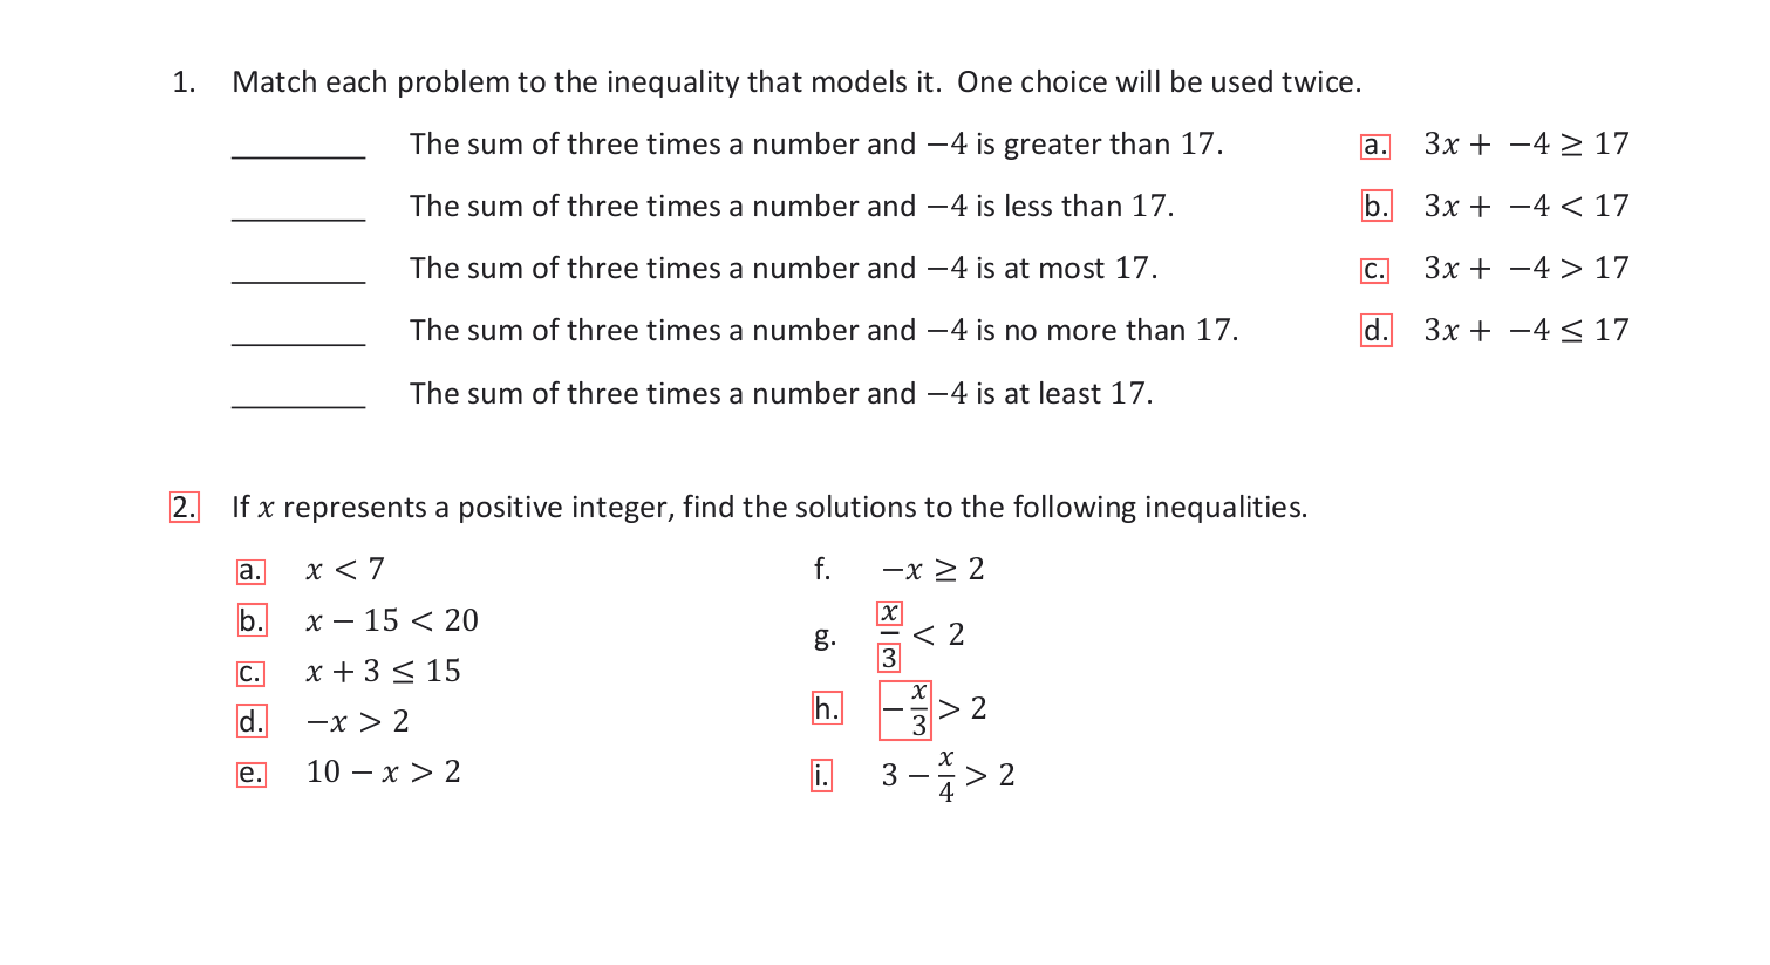

,Text,h,left,top,w
0,a.,21.0,1043.0,76.0,25.0
1,b.,27.0,1044.0,123.0,25.0
2,Cc.,21.0,1043.0,182.0,23.0
3,d.,27.0,1043.0,229.0,26.0
4,2.,26.0,26.0,381.0,25.0
5,a.,21.0,83.0,439.0,24.0
6,x,20.0,630.0,475.0,21.0
7,b.,27.0,84.0,477.0,25.0
8,3,24.0,631.0,511.0,18.0
9,Cc.,21.0,83.0,526.0,23.0


In [22]:
from skimage.measure import regionprops

line_heights = [b.height for b in merged]
avg_line_height = np.mean(line_heights)

# What did the tesseract calls above miss?
# Find the bounding boxes of felzenszwalb regions that are not contained in the bounding boxes
# that came out of tesseract....
# Note that in particular the above tesseract usage seems to miss single characters here and there 
# (like "a.", "b.", etc.)

fboxes = []
for region in regionprops(labeled_segmentsFZ):
    y0, x0, y1, x1 = region.bbox
    b = TBox(x0,y0, x1-x0, y1-y0)
    if b.height<0.6*avg_line_height:
        continue
    is_new = True
    for m in merged:
        if m.contains(b,10):
            is_new = False;
            break
    if is_new:        
        fboxes.append(b)
        
with jio.capture_output() as captured:
    fig, ax = plt.subplots()
    ax.imshow(timg)
    for b in fboxes:
        rect = patches.Rectangle((b.x0,b.y0), b.width, b.height,
                                  fill=False, edgecolor=color, alpha=0.6, linewidth=0.5)
        ax.add_patch(rect)
    ax.set_axis_off()
    plt.tight_layout()
plt.show()

# For each of these, run tesseract in single character detection mode (--psm 10), and accumulate the
# results into a pandas DataFrame

df = pandas.DataFrame()

for b in fboxes:
    image = timg[b.y0:b.y1,b.x0:b.x1]
    out = tess.image_to_data(image, lang='eng', config="--psm 10 --oem 1")
    tdata = pandas.read_csv(io.StringIO(out), sep="\t", dtype=tess_data_schema) ;
    for index, row in tdata.iterrows():
        if row.level==5:
            b.add_txt(row.text,row.conf)
    dict = {'left': b.x0, 'top':b.y0, 'w': b.width, 'h': b.height, 'Text': b.text}
    df = df.append(dict,ignore_index=True) ;

df      